# PARTIE 1

# importer la dataframe 

In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# chemin de la data
path =r'C:\Users\utilisateur\Desktop\Run_Questionnaire\DataSet'
filenames = glob.glob(path + "/DataSet*.csv")
# une boucle
dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

# fusion des dataframe
dataset_brut = pd.concat(dfs, ignore_index=True)

In [2]:
#visualisations
dataset_brut

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Score,Interpretation
0,a,a,a,a,a,1,1,1,1,1,10,B
1,b,b,b,b,b,2,2,2,2,2,0,C
2,c,c,c,c,c,3,3,3,3,3,20,A
3,a,b,c,a,b,1,2,3,1,2,8,C
4,b,c,a,c,a,3,2,3,1,2,11,B
...,...,...,...,...,...,...,...,...,...,...,...,...
221,c,c,NaN,c,c,NaN,NaN,3.0,3,3,14,B
222,b,a,c,NaN,b,NaN,2.0,NaN,3,2,5,C
223,a,c,b,NaN,NaN,1.0,NaN,3.0,2,3,8,C
224,a,n,e,a,b,v,t,Y,',1,3,C


In [3]:
# verif le % de missing
for col in dataset_brut.columns:
    pct_missing = np.mean(dataset_brut[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Q1 - 4.0%
Q2 - 6.0%
Q3 - 6.0%
Q4 - 4.0%
Q5 - 7.0%
Q6 - 6.0%
Q7 - 5.0%
Q8 - 6.0%
Q9 - 5.0%
Q10 - 4.0%
Score - 0.0%
Interpretation - 0.0%


# lisser majuscule et minuscules et chiffres

In [4]:
#on uniformise majuscule et miniscule
dataset1=dataset_brut.iloc[:,:5].replace({'A':'a', 'B': 'b', 'C': 'c'})

In [5]:
#on enleve tout ce qui n'est pas a b ou c
dataset1=dataset1[dataset1.isin(["a","b","c"])]
#dataset1= dataset1.fillna(np.NaN) #pas necessaire car on a crée une nouvelle instance

In [6]:
#selection de la deuxieme partie
dataset2=dataset_brut.iloc[:,5:10]

In [7]:
#on enleve tout ce qui n'est pas 1 2 ou 3
dataset2=dataset2[dataset2.isin(['1','1.0',1.,'2','2.0',2.,'3','3.0',3.])]

In [8]:
#lissage des chiffres
dataset2=dataset2.replace({'3':3.0, '2': 2.0, '1': 1.0})

In [9]:
#on regroupe tout tout pour obtenir un dataset pret pour la prochaine étape
dataset = pd.concat([dataset1, dataset2, dataset_brut['Interpretation']], axis=1)

# on enlève les lignes comprenant des valeures vides Na

In [10]:
dataset=dataset.dropna()

# attribution des valeurs de calcul

In [11]:
# attribution des points pour a b et c 1 2 et 3
#attention a l'ordre ou l'on le fait pour ne pas remplacer 2 par 0 apres avoir remplacé c par 2
dataset=dataset.replace({1:1, 2: 0, 3: 2})
dataset=dataset.replace({'a':1.0, 'b': 0.0, 'c': 2.0})

In [12]:
dataset

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Interpretation
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,B
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C
2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,A
3,1.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0,C
4,0.0,2.0,1.0,2.0,1.0,2.0,0.0,2.0,1.0,0.0,B
...,...,...,...,...,...,...,...,...,...,...,...
216,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,B
217,0.0,2.0,1.0,0.0,2.0,2.0,2.0,0.0,1.0,2.0,B
218,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,A
219,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,B


# divisier X et y

In [13]:
# assigner X à toutes les questions et y à la classe
# on a exlus exclus le score total un peut plus haut en concatenant
X = dataset.iloc[:, :10].values
y = dataset.iloc[:,10:11].values

# PARTIE 2

# Facultatif : KNN from scratch

Préparez une fonction permettant de calculer les 3 différentes distances : Euclidean, Manhattan et Minkowski, (def distance(metric=’ Euclidean’, **kargs)).

In [14]:
#splitting data in test and train segments
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [15]:
#Creating a helper function
def takeSecond(elem):
    return elem[1]

In [16]:
def KNNClassify(X_test, Y_train = y_train,X_train = X_train, k = 10):
   
    min_dist = []
    #for every example in the training set, calculate eucledien distance against the test example
    for i,point in enumerate(X_train):
        d1 = (point[0]-X_test[0])**2
        d2 = (point[1]-X_test[1])**2
        d3 = (point[2]-X_test[2])**2
        d4 = (point[3]-X_test[3])**2
        dist = np.sqrt(d1+d2+d3+d4)
        #append the calculated distance in a list
        min_dist.append((i,dist))
    #sort distances in ascending order    
    min_dist.sort(key = takeSecond)
    
    #get top k nearest neighbours
    neighbours = min_dist[:k]
    #get index of the minimum distances
    idx = []
    for tup in neighbours:
        idx.append(tup[0])
    #check which label has majority
    output = Y_train[idx]
    values, counts = np.unique(output, return_counts=True)
    #return label with majority occurence
    max_idx = np.argmax(counts)
    return values[max_idx]

In [17]:
predictions = list(map(KNNClassify, X_test))

In [18]:
def accuracy(pred , y_test):
    count = 0
    for i in range(len(pred)):
        if pred[i] == y_test[i]:
            count +=1
            
    return print("Accuracy =", (count/len(pred))*100, "%")

In [19]:
accuracy(predictions, y_test)

Accuracy = 79.16666666666666 %


# PARTIE 2
# KNN avec scikit learn

on va plutot utiliser le KFold qui sera plus precis

In [20]:
# ici on va utiliser le Kfold 
import numpy as np
from sklearn.model_selection import KFold

from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=14)


performance = []

kf = KFold(n_splits=5)
for train, test in kf.split(X):
    X_train = X[train,:]
    y_train = y[train,:]
    
    X_test = X[test,:]
    y_test = y[test,:]
    
    
    model.fit(X_train,y_train)
    Per = model.predict(X_test)
    
    performance.append(accuracy_score(y_test, Per))
    
print(performance)

[0.7083333333333334, 0.75, 0.8333333333333334, 0.5, 0.7391304347826086]


<ipython-input-20-7016c7d6e06b>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(X_train,y_train)
<ipython-input-20-7016c7d6e06b>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(X_train,y_train)
<ipython-input-20-7016c7d6e06b>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(X_train,y_train)
<ipython-input-20-7016c7d6e06b>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(X_train,y_train)
<ipython-input-20-7016c7d6e06b>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected

scaling inutile ici car nos variables ne varient pas assez 

ici on entraine le modèle grace a l'aide de KNeighborsClassifier

In [21]:
classifier = KNeighborsClassifier(n_neighbors=14)
classifier.fit(X_train, y_train)

<ipython-input-21-861bef96dd01>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=14)

on fait une prediction

In [22]:
y_pred = classifier.predict(X_test)

on peut enfin afficher les resultats comme ceci

In [23]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2*100,"%")

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
[[ 0  2  0]
 [ 0 11  0]
 [ 0  4  6]]
Classification Report:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         2
           B       0.65      1.00      0.79        11
           C       1.00      0.60      0.75        10

    accuracy                           0.74        23
   macro avg       0.55      0.53      0.51        23
weighted avg       0.74      0.74      0.70        23

Accuracy: 73.91304347826086 %


<ipython-input-24-9b37aab7bd32>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  errors.append(100*(1 - knn.fit(X_train, y_train).score(X_test, y_test)))
<ipython-input-24-9b37aab7bd32>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  errors.append(100*(1 - knn.fit(X_train, y_train).score(X_test, y_test)))
<ipython-input-24-9b37aab7bd32>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  errors.append(100*(1 - knn.fit(X_train, y_train).score(X_test, y_test)))
<ipython-input-24-9b37aab7bd32>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  errors.ap

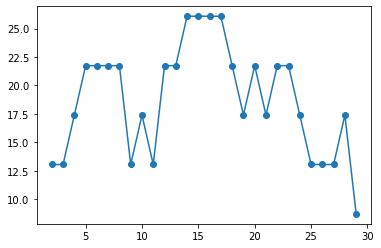

In [24]:
#visualisation du k optimal
errors = []
for k in range(2,30):
    knn = KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(X_train, y_train).score(X_test, y_test)))
plt.plot(range(2,30), errors, 'o-')
plt.show()

# test : avec XGBOOST

In [25]:
from xgboost import XGBClassifier
modele = XGBClassifier()
modele.fit(X_train, y_train)

C:\Users\utilisateur\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[16:11:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [26]:
y_pred=modele.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print('Accuracy: %.2f%%\n' % (accuracy * 100.0))
print('Matrice de confusion\n')
print(confusion)

Accuracy: 95.65%

Matrice de confusion

[[ 2  0  0]
 [ 0 10  1]
 [ 0  0 10]]


# Partie 3 : JObLIB

In [28]:
import joblib

In [29]:
filename = 'knnfinal.sav'
joblib.dump(classifier, filename)

['knnfinal.sav']